In [1]:
from IPython.display import Image

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']        = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline


In [2]:
import matplotlib

matplotlib.rcParams['font.family']        = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
sales = {'시간' : [  9, 10, 11, 12, 13, 14, 15 ],
         '제품1': [ 10, 15, 12, 11, 12, 14, 13 ],
         '제품2': [  9, 11, 14, 12, 13, 10, 12 ]
}

df = pd.DataFrame(sales, index = sales['시간'], columns = ['제품1', '제품2'])
df

,제품1,제품2
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


In [4]:
df.index.name = '시간'
df

,제품1,제품2
시간,,
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


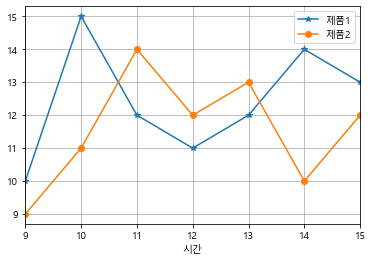

In [5]:
product_plot = df.plot(grid=True, style=['-*','-o'])
product_plot;

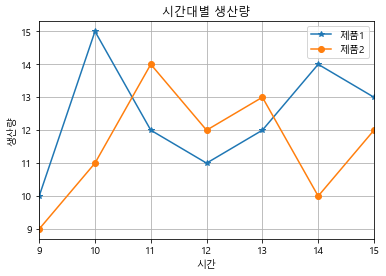

In [7]:
product_plot = df.plot(grid=True, style=['-*','-o'])
product_plot.set_title('시간대별 생산량')
product_plot.set_ylabel('생산량')

fig_file = './figures/fig_for_excel1.png'  
plt.savefig(fig_file, dpi = 400)         

plt.show()

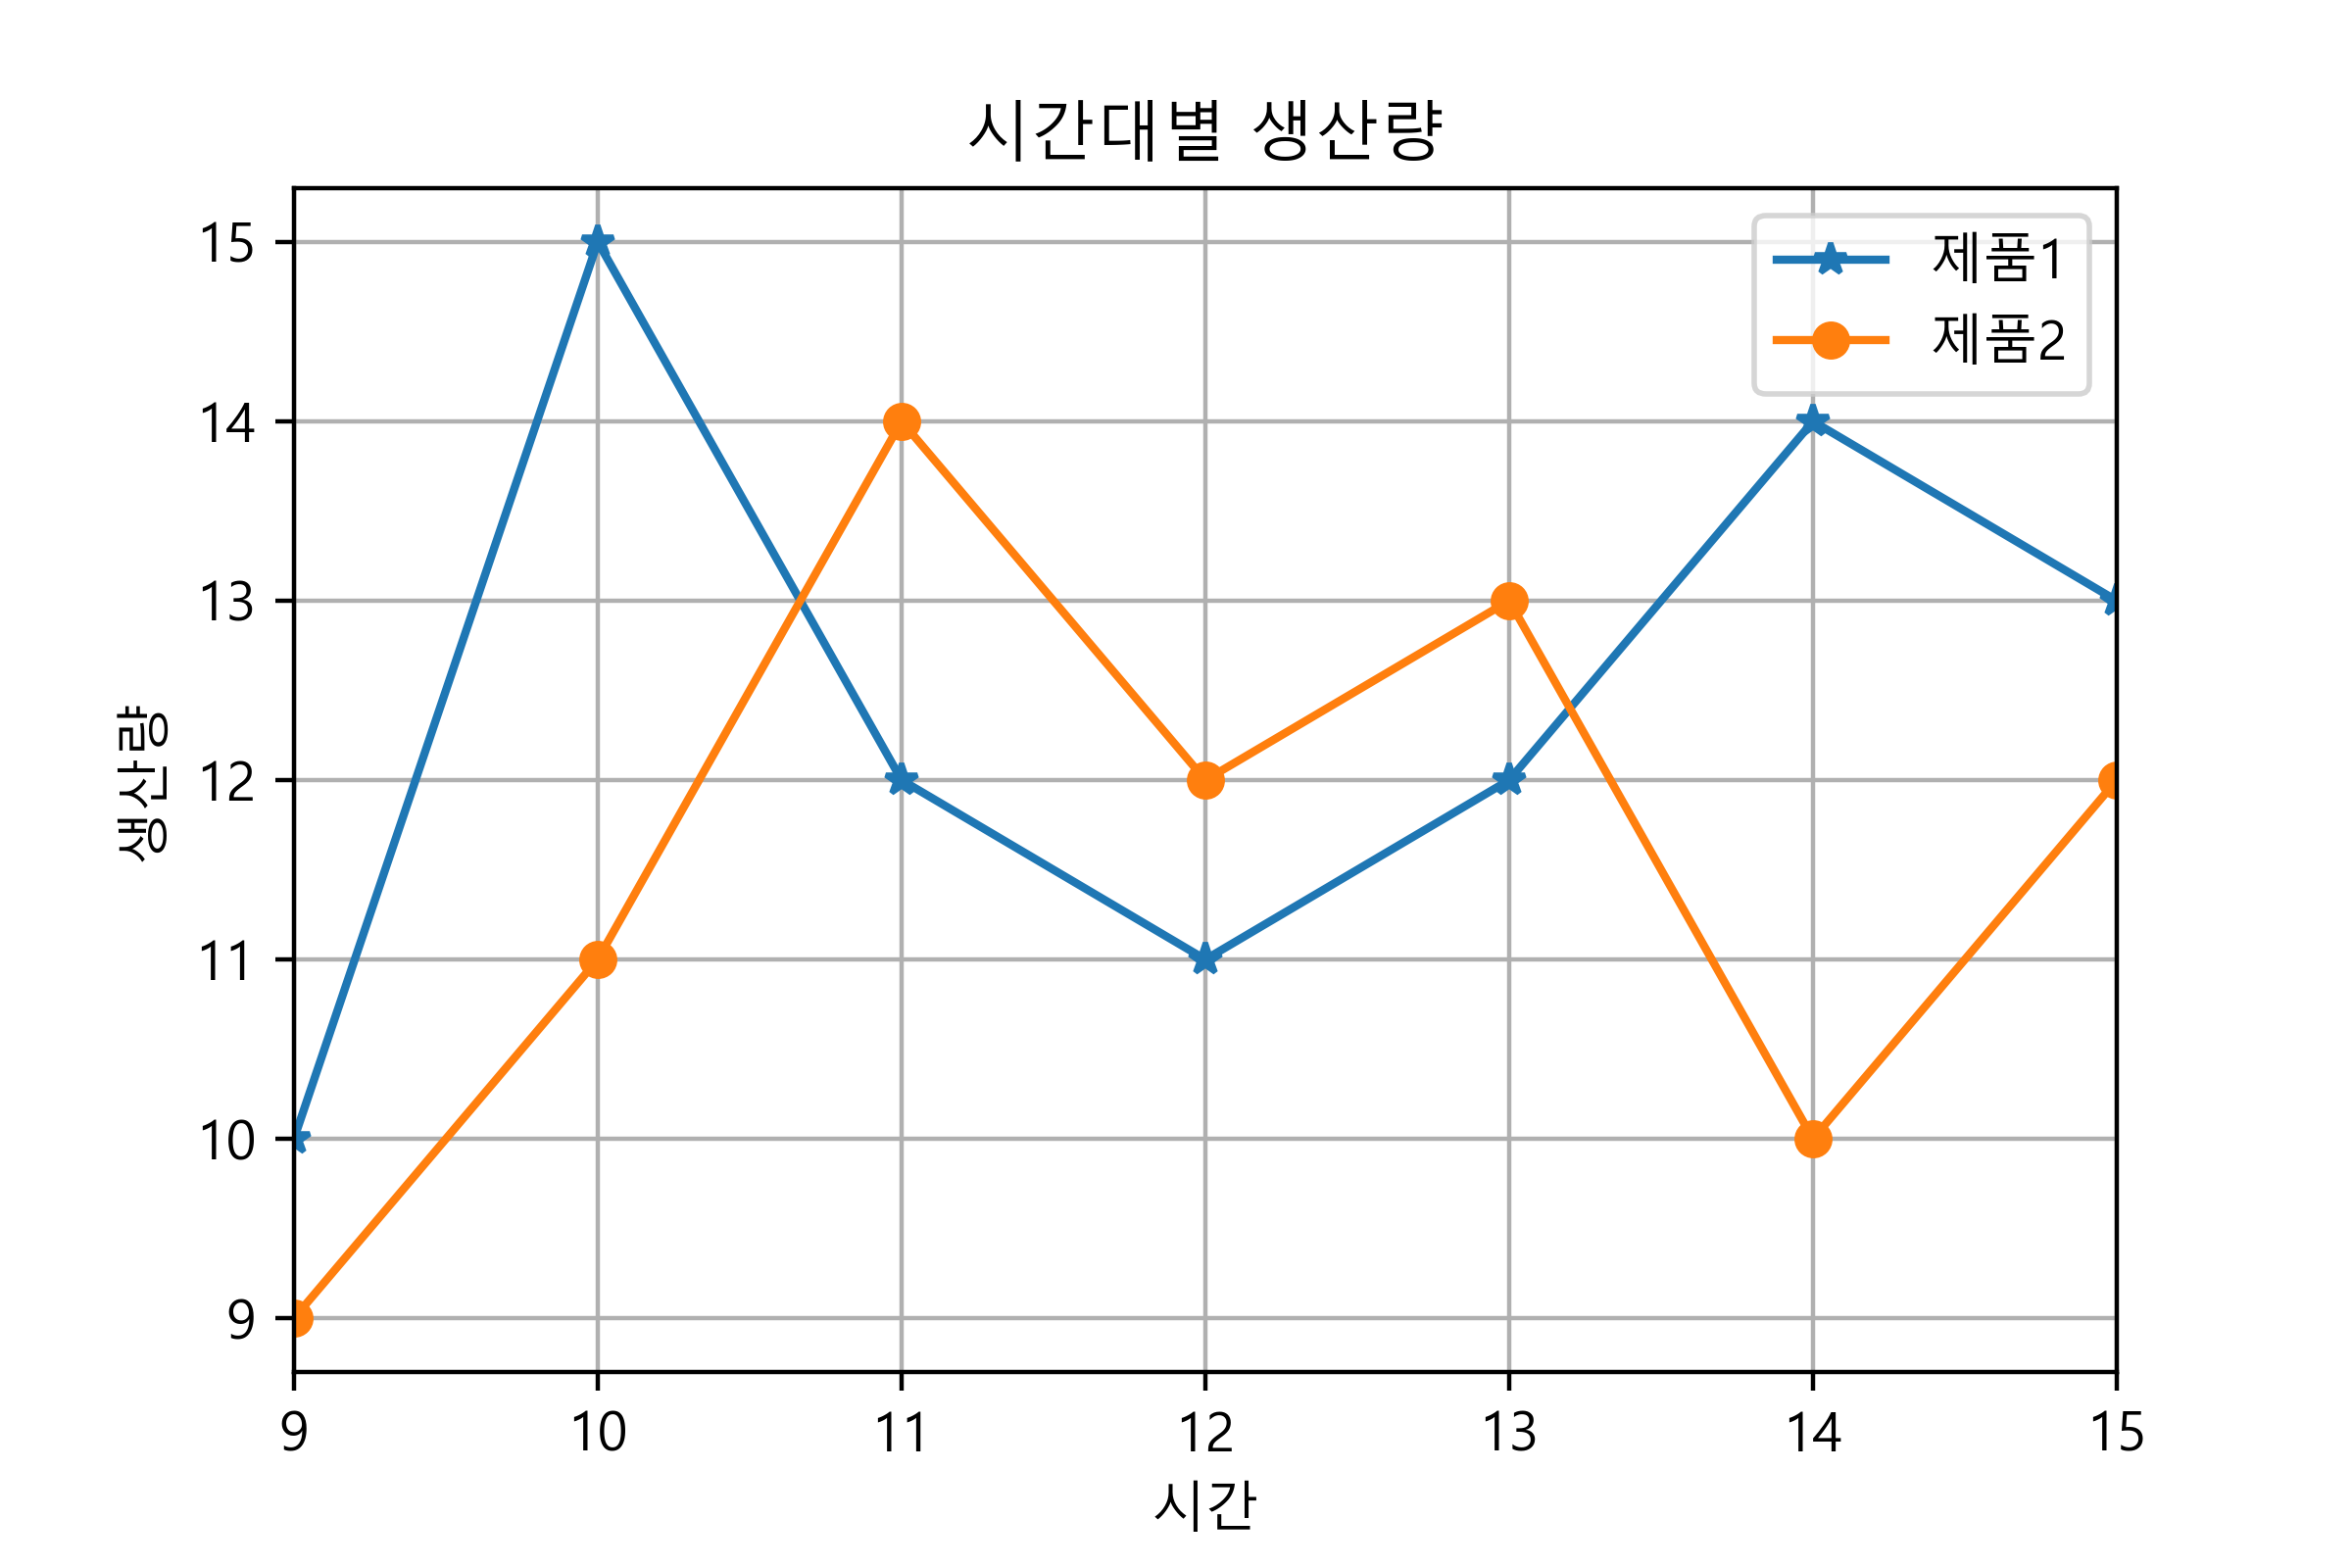

In [9]:
Image(fig_file)

In [13]:
excel_file = './data/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

df.to_excel(excel_writer, index=True, sheet_name='Sheet1')

worksheet = excel_writer.sheets['Sheet1']

worksheet.insert_image('D2', fig_file, {'x_scale':0.7, 'y_scale': 0.7})

excel_writer.save()

In [15]:
excel_file  = './data/data_chart_in_excel2.xlsx'
excel_chart = pd.ExcelWriter(excel_file, engine='xlsxwriter')

df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

workbook  = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

chart = workbook.add_chart({'type': 'bar'})

chart.add_series({'values': '=Sheet1!$B$2:$B$8'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8'})

worksheet.insert_chart('D2', chart)

excel_chart.save()